In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile
from google.colab import files


In [129]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kitlis","key":"465b0ed04fb87ab0f9dfade8be71602a"}'}

In [130]:
os.makedirs('/root/.kaggle', exist_ok=True) #создание папки и перемещение токена
!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [131]:
!kaggle datasets download -d s3r1alsh0ck/finance-dataset-for-credit-risk-fraud-detection
!unzip finance-dataset-for-credit-risk-fraud-detection.zip -d data/

Dataset URL: https://www.kaggle.com/datasets/s3r1alsh0ck/finance-dataset-for-credit-risk-fraud-detection
License(s): MIT
finance-dataset-for-credit-risk-fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  finance-dataset-for-credit-risk-fraud-detection.zip
replace data/5k.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [263]:
df = pd.read_csv("data/5k.csv") #датасет для задачи
df

,Age,Occupation,Risk Tolerance,Investment Goals,Income Level,Address,Account Balance,Deposits,Withdrawals,Transfers,International Transfers,Investments,Loan Amount,Loan Purpose,Employment Status,Loan Term (Months),Interest Rate,Loan Status,Transaction Description
0,40,Lawyer,High,Wealth Preservation,$46044.94,"7168 Moody Meadow\nHernandezshire, PW 06016",$44653.26,$9156.01,$9327.70,$3647.92,$82.80,$8729.30,$27010.93,Medical Expenses,Retired,36,11.94%,pending,"Electronics transaction of $706.18 at Sanders,..."
1,30,Teacher,Low,Wealth Preservation,$57169.50,"50001 Hector Square\nWest Luisfurt, MA 51935",$29175.47,$5933.22,$8671.60,$6729.86,$819.69,$4545.18,$31266.97,Auto Purchase,Retired,36,8.08%,approved,Transaction at Evans-Smith for $2250.03
2,37,Teacher,Low,Speculation,$71760.86,"997 James Isle\nNorth Rebeccafurt, RI 13366",$86141.59,$22583.11,$16468.58,$6032.53,$1526.33,$8251.45,$41260.58,Auto Purchase,Employed,12,13.07%,pending,Purchase at Taylor-Gutierrez for $615.85 on 20...
3,27,Student,Medium,Speculation,$-25488.15,"1607 Joshua Camp Apt. 634\nConleymouth, CT 66479",$1000.00,$299.47,$289.09,$109.83,$3.51,$195.73,$5000.00,Small Business,Retired,60,6.73%,approved,Travel transaction of $4852.39 at Jones-Russell
4,36,Engineer,Low,Income Generation,$106777.95,"96690 Campbell Common\nDwaynetown, MI 71857",$77918.97,$13853.25,$22699.32,$12189.32,$2152.51,$9725.21,$50000.00,Medical Expenses,Employed,24,10.60%,approved,"Purchase at Jensen, Porter and Webb for $562.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21,Engineer,High,Income Generation,$92640.59,"43377 Brooke Gateway\nKyleville, IL 60381",$100000.00,$24890.81,$17829.06,$21150.16,$5161.83,$32126.21,$50000.00,Medical Expenses,Unemployed,24,11.41%,approved,"Payment of $1284.07 at Curtis, Perez and Sandoval"
4996,20,Student,Low,Wealth Preservation,$100107.46,1156 Christopher Mountain Suite 011\nEast Jimm...,$29879.73,$5384.31,$6262.80,$3931.47,$757.33,$2529.55,$50000.00,Auto Purchase,Self-Employed,24,9.38%,approved,"$2881.42 spent at Smith, Martin and Velez on 2..."
4997,53,Lawyer,Low,Speculation,$6058.18,"92818 Mary Garden Suite 343\nGuerramouth, DE 6...",$9673.78,$3274.37,$1832.16,$1742.00,$354.33,$898.41,$7054.49,Medical Expenses,Self-Employed,60,10.02%,pending,"Transaction at Brown, Rubio and Nolan for $324..."
4998,75,Student,Medium,Growth,$76214.25,"6197 Stephanie Circles Apt. 765\nCherylstad, N...",$90780.00,$35679.58,$12022.55,$12832.11,$3389.92,$6370.88,$34847.26,Home Improvement,Retired,48,8.49%,approved,"Transaction at Tucker, Tyler and Jacobson for ..."


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      5000 non-null   int64 
 1   Occupation               5000 non-null   object
 2   Risk Tolerance           5000 non-null   object
 3   Investment Goals         5000 non-null   object
 4   Income Level             5000 non-null   object
 5   Address                  5000 non-null   object
 6   Account Balance          5000 non-null   object
 7   Deposits                 5000 non-null   object
 8   Withdrawals              5000 non-null   object
 9   Transfers                5000 non-null   object
 10  International Transfers  5000 non-null   object
 11  Investments              5000 non-null   object
 12  Loan Amount              5000 non-null   object
 13  Loan Purpose             5000 non-null   object
 14  Employment Status        5000 non-null  

Датасет не содержит NaN'ов, целевая переменная - категориальная (Loan Status), только 2 признака в числовом формате, остальные нужно обработать/удалить.

In [264]:
cols_to_clean = [
    "Income Level", "Account Balance", "Deposits", "Withdrawals",
    "Transfers", "International Transfers", "Investments", "Loan Amount", "Interest Rate"
]

In [265]:
df[cols_to_clean] = df[cols_to_clean].replace('[\$,%,]', '', regex=True).astype(float) #удаление $ и %
df['Interest Rate'] = df['Interest Rate'] / 100 #перевод численных значений % в доли

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5000 non-null   int64  
 1   Occupation               5000 non-null   object 
 2   Risk Tolerance           5000 non-null   object 
 3   Investment Goals         5000 non-null   object 
 4   Income Level             5000 non-null   float64
 5   Address                  5000 non-null   object 
 6   Account Balance          5000 non-null   float64
 7   Deposits                 5000 non-null   float64
 8   Withdrawals              5000 non-null   float64
 9   Transfers                5000 non-null   float64
 10  International Transfers  5000 non-null   float64
 11  Investments              5000 non-null   float64
 12  Loan Amount              5000 non-null   float64
 13  Loan Purpose             5000 non-null   object 
 14  Employment Status       

Теперь посмотрим на текстовые признаки и проанализируем их. Адрес можно сразу удалить (для построения базовой модели точно не нужен, для дальнейшего NLP-тюнинга даст мало информации) - просто шум для модели, 'Transaction description' пока тоже можно удалить, при построении более сложной модели с использованием NLP можно проанализировать.
Посмотрим количество уникальных значений в текстовых данных.

In [266]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols].nunique().sort_values(ascending=False)

,0
Address,5000
Transaction Description,5000
Occupation,7
Loan Purpose,5
Employment Status,4
Investment Goals,4
Risk Tolerance,3
Loan Status,3


Все, кроме 'Address' и 'Transaction Description' пока оставляем, мало уникальных значений.

In [267]:
df = df.drop(columns=['Address', 'Transaction Description'])

# Baseline

Loan Status - целевая переменная. Посмотрим на ее распределение.



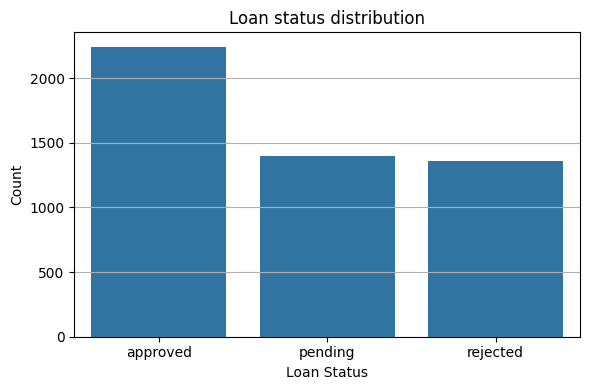

In [139]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Loan Status', order=df['Loan Status'].value_counts().index)
plt.title('Loan status distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

'Approved' примерно в полтора раза больше, чем 'pending' и 'rejected', но критичного перевеса нет, использовать методы борьбы с дисбалансом классов не нужно, но дальше буду использовать также устойчивые к дисбалансу метрики для страховки :)

Построю базовую модель без дальнейшего анализа, дальше буду заниматься анализом и строить другие модели. Выбираю CatBoost, потому что категориальных признаков много, вручную кодировать их не хочется.

In [268]:
cat_features = ['Occupation', 'Loan Purpose', 'Employment Status', 'Investment Goals', 'Risk Tolerance']

In [286]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Loan Status'] = le.fit_transform(df['Loan Status']) #закодировал целевую переменную

In [142]:
!pip install catboost

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score
)
from catboost import CatBoostClassifier

In [146]:
X = df.drop(columns=['Loan Status'])
y = df['Loan Status']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

Learning rate set to 0.084924
0:	learn: 1.0257095	total: 89ms	remaining: 1m 28s
100:	learn: 0.4622361	total: 11.3s	remaining: 1m 40s
200:	learn: 0.3820954	total: 17.7s	remaining: 1m 10s
300:	learn: 0.3371456	total: 22.9s	remaining: 53.1s
400:	learn: 0.3000313	total: 26.4s	remaining: 39.4s
500:	learn: 0.2676820	total: 30.3s	remaining: 30.2s
600:	learn: 0.2390959	total: 35.7s	remaining: 23.7s
700:	learn: 0.2145641	total: 39.4s	remaining: 16.8s
800:	learn: 0.1926974	total: 44.1s	remaining: 10.9s
900:	learn: 0.1757668	total: 48.3s	remaining: 5.31s
999:	learn: 0.1611539	total: 52s	remaining: 0us
Accuracy: 0.732

Classification Report:
              precision    recall  f1-score   support

    approved       0.96      0.99      0.98       448
     pending       0.54      0.57      0.56       280
    rejected       0.53      0.47      0.50       272

    accuracy                           0.73      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.73      0.73   

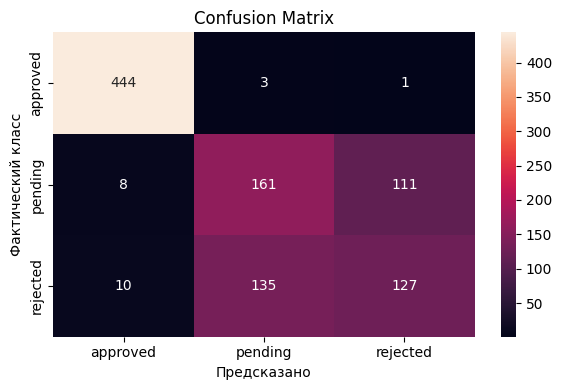

ROC AUC (multi-class): 0.8389
Gini coefficient: 0.6778


In [148]:
model = CatBoostClassifier(
    verbose=100,
    cat_features=cat_features,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test) #предсказания
y_proba = model.predict_proba(X_test)

#метрики
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Предсказано')
plt.ylabel('Фактический класс')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

#roc-auc и gini
auc = roc_auc_score(y_test, y_proba, multi_class='ovo', average='macro')
gini = 2 * auc - 1
print(f"ROC AUC (multi-class): {auc:.4f}")
print(f"Gini coefficient: {gini:.4f}")

Gini высокий, дискриминирующая способность у модели нормальная. Approved модель предсказывает очень хорошо (судя по метрикам), но pending и rejected различает плохо. Буду делать EDA и строить более "сильную" модель.

# EDA

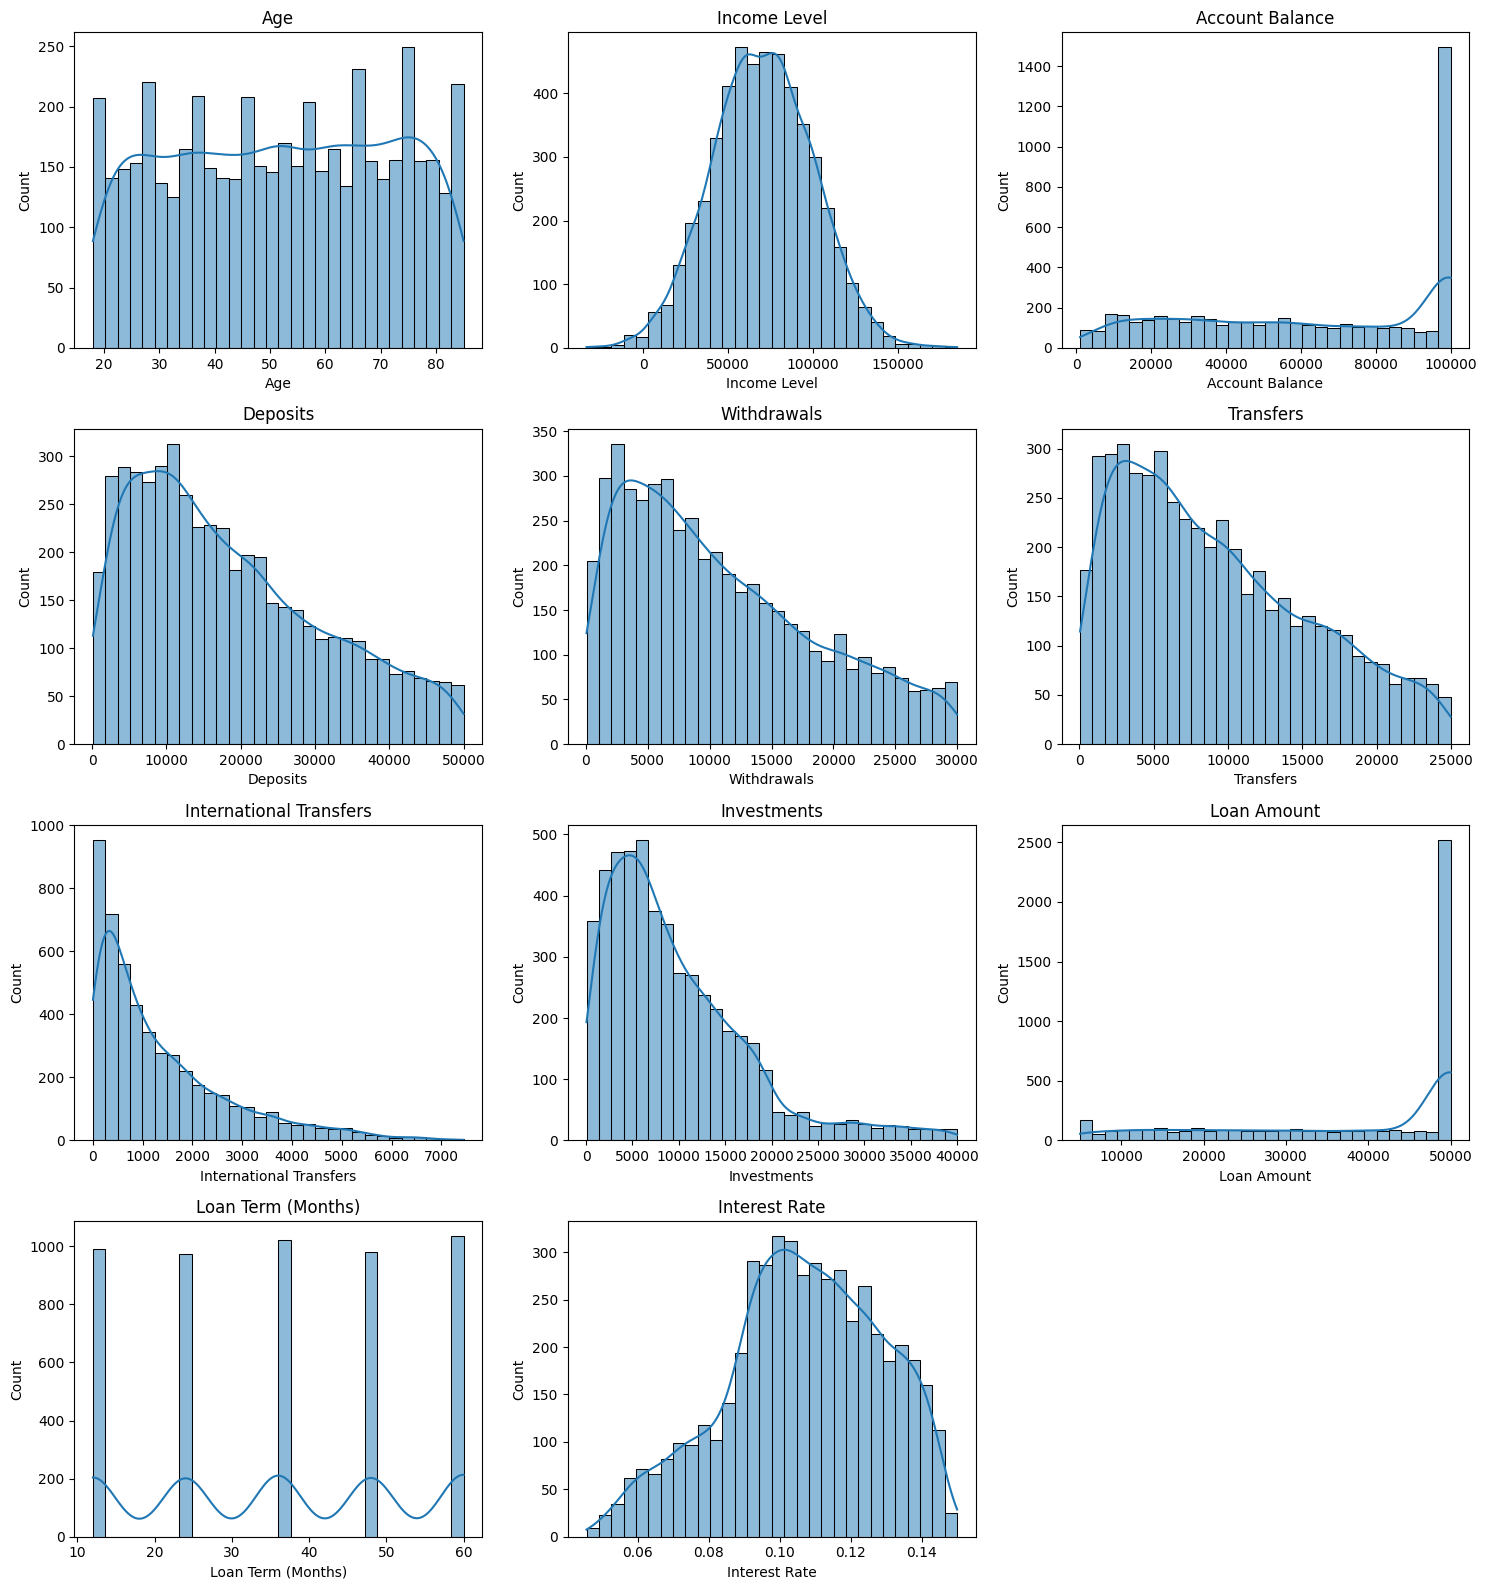

In [269]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

if 'Loan Status' in numeric_cols:
    numeric_cols.remove('Loan Status')
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


Loan Term - по сути категориальный признак. Для возраста видим почти равномерное распределение, стоит проверить детальнее.

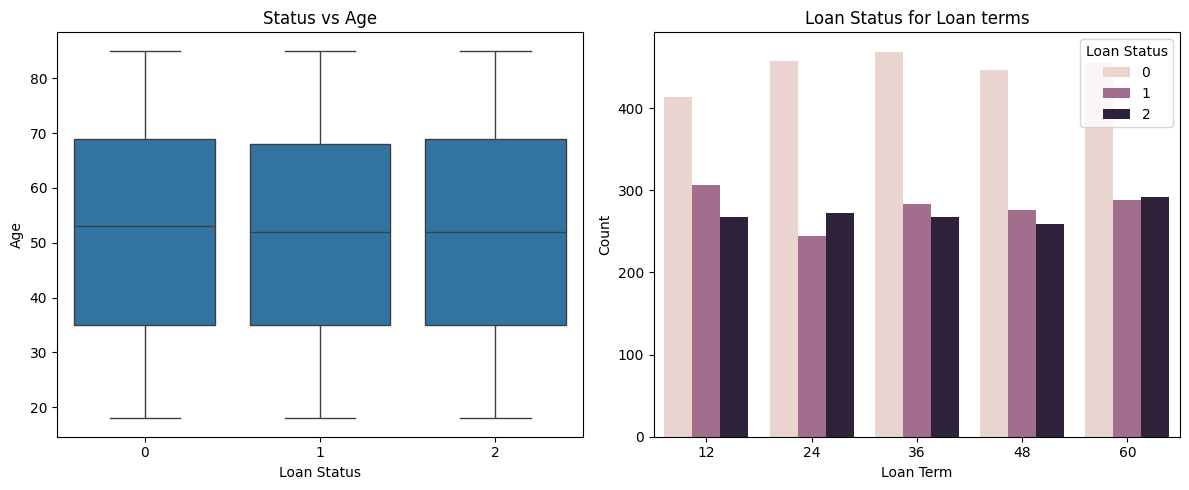

In [151]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Loan Status', y='Age')
plt.title('Status vs Age')
plt.xlabel('Loan Status')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Loan Term (Months)', hue='Loan Status')
plt.title('Loan Status for Loan terms')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

Cрок займа влияет на статус, а медиана для всех статусов почти одинакова, следовательно, возраст имеет слабую предсказательную силу, а срок оставляем как категориальный признак.

In [270]:
df['Loan Term (Months)'] = df['Loan Term (Months)'].astype('object')  #преобразуем Loan Term (Months) в категориальный признак

Возраст преобразуем в группы по возрастам.

In [271]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 100],
                         labels=['<30', '31–45', '46–60', '60+'])

In [272]:
pd.crosstab(df['Age Group'], df['Loan Status'], normalize='index') * 100

Loan Status,approved,pending,rejected
Age Group,,,
<30,44.051447,27.545552,28.403001
31–45,43.357934,30.535055,26.107011
46–60,44.566210,28.127854,27.305936
60+,46.186441,26.694915,27.118644


Rejected чаще у молодых (до 30 лет) — 28.8%. Pending больше у 31–45 (30.5%). Оставим возрастные группы, age удалим, но даже возрастные группы несут мало полезной информации.

In [273]:
df.drop(columns=['Age'], inplace=True)

У income level распределение близко к нормальному, его не преобразуем. Есть признаки с явным перекосом, распределение далеко от нормального, их лучше прологарифмировать.

In [274]:
log_cols = [
    'Account Balance', 'Deposits', 'Withdrawals',
    'Transfers', 'International Transfers', 'Investments', 'Loan Amount'
]

for col in log_cols:
    df[f'{col} Log'] = np.log1p(df[col])

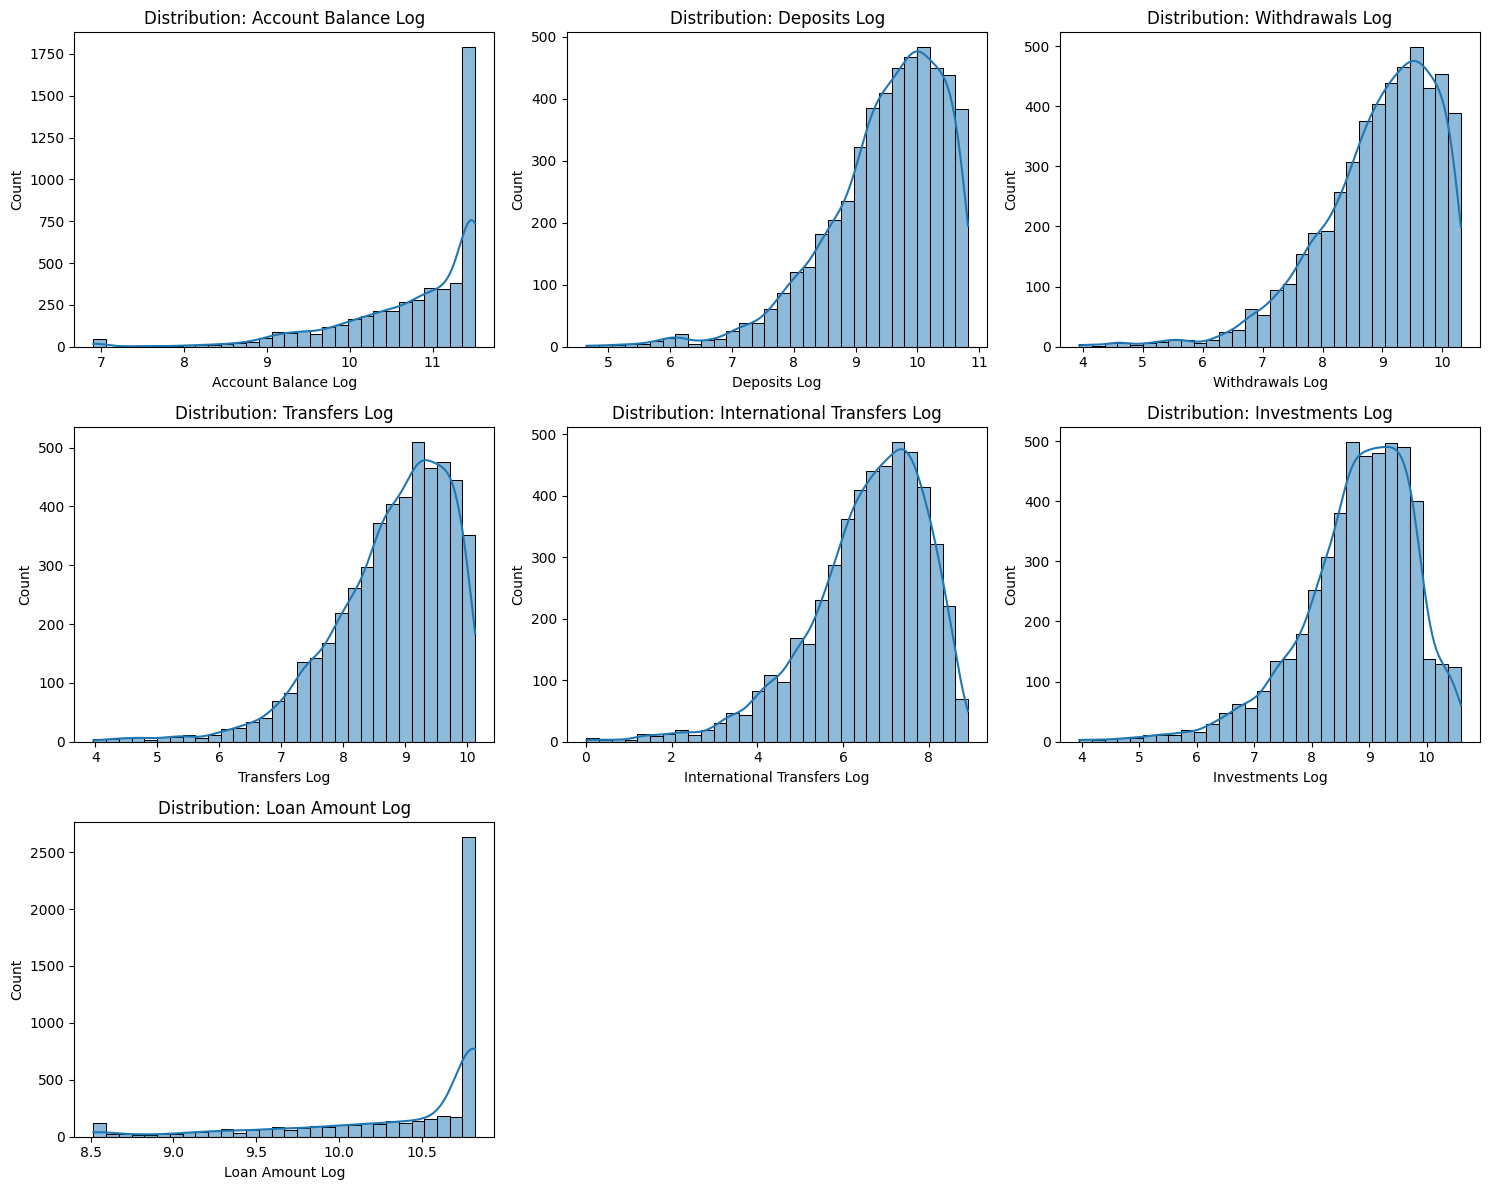

In [157]:
n_cols = 3
n_rows = int(np.ceil(len(log_cols) / n_cols))

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(log_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[f'{col} Log'], bins=30, kde=True)
    plt.title(f'Distribution: {col} Log')

plt.tight_layout()
plt.show()

Все еще есть перекос (вправо), но распределения стали более сжатыми, старые (до логарифмирования) признаки удаляем.

In [275]:
df.drop(columns=log_cols, inplace=True)

Построим corrmap для числовых признаков.

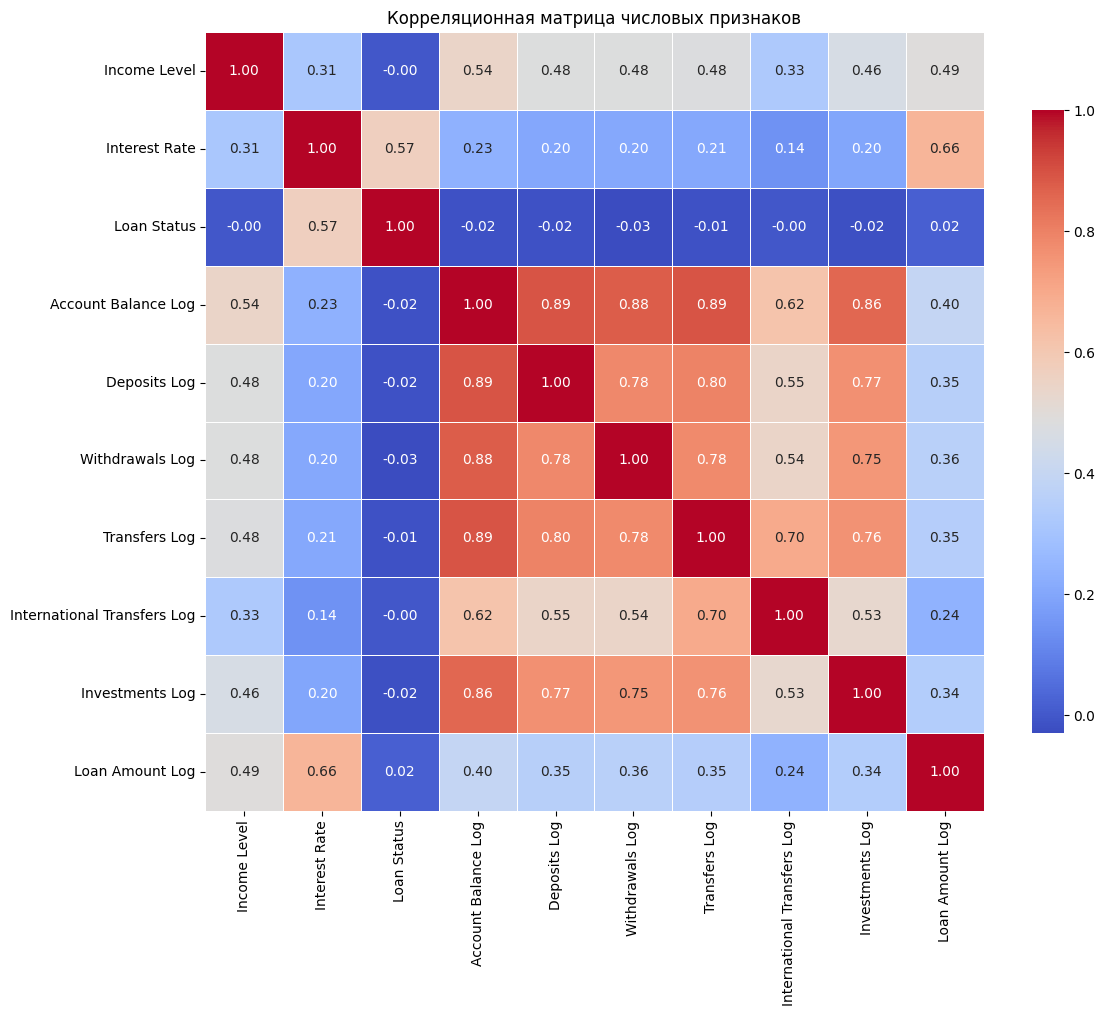

In [230]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_df.corr()

#построение heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={'shrink': 0.8}, linewidths=0.5)
plt.title("Корреляционная матрица числовых признаков")
plt.tight_layout()
plt.show()

Есть признаки, сильно коррелирующие с Account Balance Log, удаляем их.

In [276]:
df.drop(columns=['Deposits Log', 'Transfers Log'], inplace=True)

In [277]:
df

,Occupation,Risk Tolerance,Investment Goals,Income Level,Loan Purpose,Employment Status,Loan Term (Months),Interest Rate,Loan Status,Age Group,Account Balance Log,Withdrawals Log,International Transfers Log,Investments Log,Loan Amount Log
0,Lawyer,High,Wealth Preservation,46044.94,Medical Expenses,Retired,36,0.1194,pending,31–45,10.706705,9.140851,4.428433,9.074555,10.204034
1,Teacher,Low,Wealth Preservation,57169.50,Auto Purchase,Retired,36,0.0808,approved,<30,10.281118,9.067924,6.710145,8.422043,10.350350
2,Teacher,Low,Speculation,71760.86,Auto Purchase,Employed,12,0.1307,pending,31–45,11.363759,9.709270,7.331276,9.018265,10.627687
3,Student,Medium,Speculation,-25488.15,Small Business,Retired,60,0.0673,approved,<30,6.908755,5.670191,1.506297,5.281832,8.517393
4,Engineer,Low,Income Generation,106777.95,Medical Expenses,Employed,24,0.1060,approved,31–45,11.263438,10.030134,7.674854,9.182580,10.819798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Engineer,High,Income Generation,92640.59,Medical Expenses,Unemployed,24,0.1141,approved,<30,11.512935,9.788641,8.549240,10.377459,10.819798
4996,Student,Low,Wealth Preservation,100107.46,Auto Purchase,Self-Employed,24,0.0938,approved,<30,10.304969,8.742542,6.631119,7.836192,10.819798
4997,Lawyer,Low,Speculation,6058.18,Medical Expenses,Self-Employed,60,0.1002,pending,46–60,9.177278,7.513797,5.873047,6.801739,8.861561
4998,Student,Medium,Growth,76214.25,Home Improvement,Retired,48,0.0849,approved,60+,11.416205,9.394623,8.128857,8.759650,10.458758


Так как работаем с градиентным бустингом, стандартизовывать числовые признаки не нужно. Попробую добавить новые признаки и учесть вес классов при следующем обучении, так как модель хорошо определяет только 'approved'.

Функция для обучения, предсказания и результатов

In [213]:
def train_catboost_classifier(X_train, X_test, y_train, y_test, cat_features=None, class_weights=None, target_names=None, verbose=100):
    """
    Parameters:
        X_train, X_test: признаки
        y_train, y_test: целевая переменная
        cat_features: список категориальных признаков
        class_weights: словарь весов классов
        target_names: список имён классов для отчёта
        verbose: вывод логов обучения

    Return:
        model: обученная модель
    """
    model = CatBoostClassifier(
        verbose=100,
        cat_features=cat_features,
        class_weights=class_weights,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    #метрики
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    #confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=target_names, yticklabels=target_names, cmap='Blues')
    plt.xlabel('Предсказано')
    plt.ylabel('Факт')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    #ROC-AUC и Gini
    auc = roc_auc_score(y_test, y_proba, multi_class='ovo', average='macro')
    gini = 2 * auc - 1
    print(f"ROC AUC (multi-class): {auc:.4f}")
    print(f"Gini coefficient: {gini:.4f}")

    return model

In [279]:
original_df = pd.read_csv("data/5k.csv") #загрузим снова оригинальный файл, чтобы восстановить удалённые признаки

money_cols_to_restore = ['Deposits', 'Withdrawals'] #преобразуем числовые колонки обратно в float, как раньше

original_df[money_cols_to_restore] = original_df[money_cols_to_restore].replace('[\$,]', '', regex=True).astype(float) #очистим $ и приведём к float

for col in money_cols_to_restore:
    df[col] = original_df[col]

#вновь логарифмируем
df['Deposits Log'] = np.log1p(df['Deposits'])
df['Withdrawals Log'] = np.log1p(df['Withdrawals'])

#создание новых признаков:
df['loan_to_income'] = df['Loan Amount Log'] / (df['Income Level'] + 1e-5) #оценка кредитной нагрузки
df['investment_ratio'] = df['Investments Log'] / (df['Income Level'] + 1e-5) #доля инвестиций от дохода (насколько активно клиент инвестирует свои доходы)
df['balance_delta'] = df['Deposits Log'] - df['Withdrawals Log'] #сколько клиент сохраняет (положительное значение) или тратит (отрицательное)
df['balance_to_loan'] = df['Account Balance Log'] / (df['Loan Amount Log'] + 1e-5) #отношение текущего баланса к сумме кредита (насколько у клиента достаточно средств по сравнению с кредитом)
df['activity_ratio'] = (df['Deposits Log'] + df['Withdrawals Log']) / (df['Loan Amount Log'] + 1e-5) #(депозиты + снятия / кредит)

#итоговая информация по полученным признакам
df[['loan_to_income', 'investment_ratio', 'balance_delta', 'balance_to_loan', 'activity_ratio']].describe()

,loan_to_income,investment_ratio,balance_delta,balance_to_loan,activity_ratio
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.000176,0.000148,0.550429,1.037399,1.773156
std,0.000910,0.000573,0.640665,0.084635,0.174161
min,-0.035465,-0.022460,-1.057900,0.754796,1.061882
25%,0.000115,0.000098,0.103456,0.994367,1.679330
50%,0.000148,0.000125,0.551611,1.052457,1.795693
75%,0.000203,0.000172,0.973803,1.068601,1.879084
max,0.025238,0.015816,2.297857,1.320093,2.323813


In [170]:
cat_features = ['Occupation', 'Loan Purpose', 'Employment Status', 'Investment Goals', 'Risk Tolerance', 'Age Group', 'Loan Term (Months)']

In [171]:
X = df.drop(columns=['Loan Status'])
y = df['Loan Status']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

Learning rate set to 0.084924
0:	learn: 1.0482118	total: 47.5ms	remaining: 47.5s
100:	learn: 0.5902028	total: 6.52s	remaining: 58s
200:	learn: 0.4888623	total: 13.8s	remaining: 54.9s
300:	learn: 0.4239124	total: 21.5s	remaining: 49.8s
400:	learn: 0.3700525	total: 28s	remaining: 41.9s
500:	learn: 0.3266216	total: 35.9s	remaining: 35.8s
600:	learn: 0.2903353	total: 42.3s	remaining: 28.1s
700:	learn: 0.2603909	total: 50.1s	remaining: 21.4s
800:	learn: 0.2327961	total: 56s	remaining: 13.9s
900:	learn: 0.2096274	total: 1m 4s	remaining: 7.09s
999:	learn: 0.1899341	total: 1m 12s	remaining: 0us
Accuracy: 0.723

Classification Report:
              precision    recall  f1-score   support

    approved       0.97      0.98      0.97       448
     pending       0.55      0.45      0.49       280
    rejected       0.50      0.59      0.54       272

    accuracy                           0.72      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.72      0.72      0

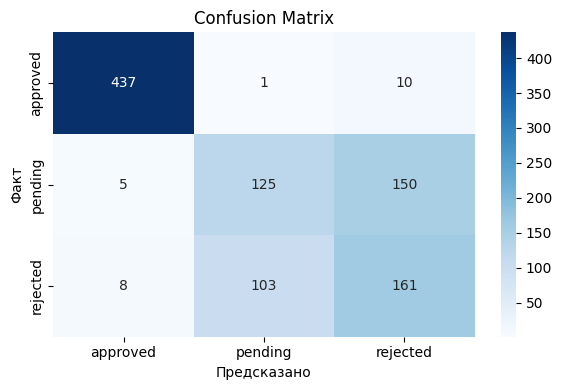

ROC AUC (multi-class): 0.8425
Gini coefficient: 0.6850


In [182]:
model = train_catboost_classifier(
    X_train, X_test, y_train, y_test,
    cat_features=cat_features,
    class_weights={0:1, 1:2, 2:2.5},
    target_names=['approved', 'pending', 'rejected']
)

In [183]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Interest Rate,42.131802
1,Loan Amount Log,15.064227
2,Loan Purpose,3.644439
3,International Transfers Log,3.317496
4,balance_delta,3.171349
5,Age Group,3.091800
6,Investments Log,2.900140
7,Occupation,2.770206
8,balance_to_loan,2.757812
9,activity_ratio,2.214870


Gini и ROC-AUC выросли. В датасете также осталось несколько признаков, которые были до логарифмирования + для формирования новых признаков потребовалось добавить те, которые я удалил, так что их снова удаляем. Уберу дублирующие признаки и снова обучу модель.

In [280]:
cols_to_drop = [
    'Withdrawals',
    'Deposits Log',
    'Deposits'
]

df.drop(columns=cols_to_drop, inplace=True)

In [287]:
X = df.drop(columns=['Loan Status'])
y = df['Loan Status']

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [284]:
cat_features = ['Occupation', 'Loan Purpose', 'Employment Status', 'Investment Goals', 'Age Group', 'Loan Term (Months)', 'Risk Tolerance']

Learning rate set to 0.084924
0:	learn: 1.0516695	total: 155ms	remaining: 2m 35s
100:	learn: 0.5945908	total: 5.73s	remaining: 51s
200:	learn: 0.4866839	total: 12.7s	remaining: 50.4s
300:	learn: 0.4230732	total: 19.3s	remaining: 44.9s
400:	learn: 0.3699305	total: 26.1s	remaining: 39s
500:	learn: 0.3269734	total: 32.4s	remaining: 32.3s
600:	learn: 0.2890802	total: 39.3s	remaining: 26.1s
700:	learn: 0.2593720	total: 45.1s	remaining: 19.3s
800:	learn: 0.2322328	total: 52.6s	remaining: 13.1s
900:	learn: 0.2107361	total: 58.9s	remaining: 6.47s
999:	learn: 0.1902509	total: 1m 6s	remaining: 0us
Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

    approved       0.96      0.98      0.97       448
     pending       0.56      0.47      0.51       280
    rejected       0.52      0.59      0.55       272

    accuracy                           0.73      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.73      0.73      0

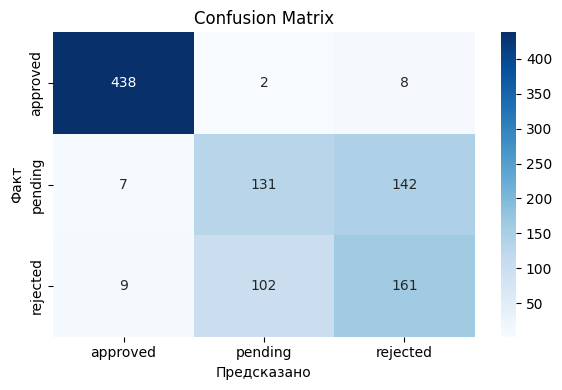

ROC AUC (multi-class): 0.8471
Gini coefficient: 0.6942


In [239]:
model = train_catboost_classifier(
    X_train, X_test, y_train, y_test,
    cat_features=cat_features,
    class_weights={0:1, 1:2, 2:2.5},
    target_names=['approved', 'pending', 'rejected']
)

Gini и ROC-AUC вновь немного улучшились. Более слабые признаки я также убирал, но с ними качество только падало, так что я решил не приводить эти эксперименты тут :)
Дальше явно нужно уже что-то делать с самой моделью.

In [278]:
df

,Occupation,Risk Tolerance,Investment Goals,Income Level,Loan Purpose,Employment Status,Loan Term (Months),Interest Rate,Loan Status,Age Group,Account Balance Log,Withdrawals Log,International Transfers Log,Investments Log,Loan Amount Log
0,Lawyer,High,Wealth Preservation,46044.94,Medical Expenses,Retired,36,0.1194,pending,31–45,10.706705,9.140851,4.428433,9.074555,10.204034
1,Teacher,Low,Wealth Preservation,57169.50,Auto Purchase,Retired,36,0.0808,approved,<30,10.281118,9.067924,6.710145,8.422043,10.350350
2,Teacher,Low,Speculation,71760.86,Auto Purchase,Employed,12,0.1307,pending,31–45,11.363759,9.709270,7.331276,9.018265,10.627687
3,Student,Medium,Speculation,-25488.15,Small Business,Retired,60,0.0673,approved,<30,6.908755,5.670191,1.506297,5.281832,8.517393
4,Engineer,Low,Income Generation,106777.95,Medical Expenses,Employed,24,0.1060,approved,31–45,11.263438,10.030134,7.674854,9.182580,10.819798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Engineer,High,Income Generation,92640.59,Medical Expenses,Unemployed,24,0.1141,approved,<30,11.512935,9.788641,8.549240,10.377459,10.819798
4996,Student,Low,Wealth Preservation,100107.46,Auto Purchase,Self-Employed,24,0.0938,approved,<30,10.304969,8.742542,6.631119,7.836192,10.819798
4997,Lawyer,Low,Speculation,6058.18,Medical Expenses,Self-Employed,60,0.1002,pending,46–60,9.177278,7.513797,5.873047,6.801739,8.861561
4998,Student,Medium,Growth,76214.25,Home Improvement,Retired,48,0.0849,approved,60+,11.416205,9.394623,8.128857,8.759650,10.458758


# Model selection and training

Уже решал подобную задачу и там у меня хорошо сработали параметры catboost, которые использовал ниже

0:	learn: 1.0838429	total: 83ms	remaining: 1m 6s
100:	learn: 0.8217430	total: 5.06s	remaining: 35s
200:	learn: 0.6833418	total: 11.1s	remaining: 33.2s
300:	learn: 0.5473730	total: 16.5s	remaining: 27.4s
400:	learn: 0.4923454	total: 25.6s	remaining: 25.5s
500:	learn: 0.4479121	total: 32.3s	remaining: 19.3s
600:	learn: 0.4132259	total: 39.7s	remaining: 13.1s
700:	learn: 0.3809433	total: 46s	remaining: 6.5s
799:	learn: 0.3533252	total: 53.9s	remaining: 0us
Accuracy: 0.746

Classification Report:
              precision    recall  f1-score   support

    approved       0.98      0.98      0.98       448
     pending       0.59      0.45      0.51       280
    rejected       0.54      0.67      0.60       272

    accuracy                           0.75      1000
   macro avg       0.70      0.70      0.69      1000
weighted avg       0.75      0.75      0.74      1000



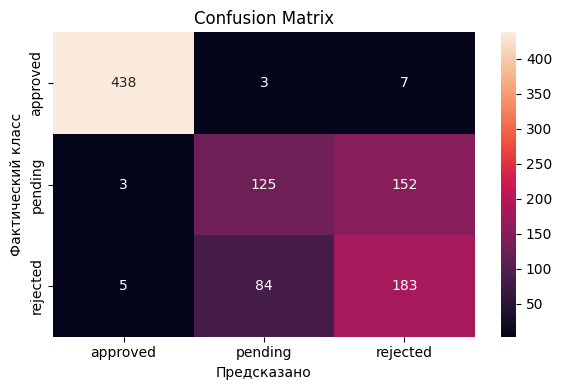

ROC AUC (multi-class): 0.8473
Gini coefficient: 0.6945


In [256]:
model = CatBoostClassifier(
    iterations=800,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    bagging_temperature=0.5,
    random_strength=5,
    class_weights={0: 1, 1: 2, 2: 2.5},
    cat_features=cat_features,
    verbose=100,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test) #предсказания
y_proba = model.predict_proba(X_test)

#метрики
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Предсказано')
plt.ylabel('Фактический класс')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

#roc-auc и gini
auc = roc_auc_score(y_test, y_proba, multi_class='ovo', average='macro')
gini = 2 * auc - 1
print(f"ROC AUC (multi-class): {auc:.4f}")
print(f"Gini coefficient: {gini:.4f}")

Видим, что с этими параметрами метрики вновь немного выросли, но теперь попробую сделать подбор параметров.

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0:	learn: 1.0754405	total: 130ms	remaining: 2m 9s
100:	learn: 0.7442196	total: 3.91s	remaining: 34.8s
200:	learn: 0.5471413	total: 11.5s	remaining: 45.6s
300:	learn: 0.4788062	total: 18.1s	remaining: 41.9s
400:	learn: 0.4324035	total: 26.2s	remaining: 39.2s
500:	learn: 0.3890022	total: 32.7s	remaining: 32.6s
600:	learn: 0.3552276	total: 40.7s	remaining: 27s
700:	learn: 0.3227097	total: 48.8s	remaining: 20.8s
800:	learn: 0.2949092	total: 54.8s	remaining: 13.6s
900:	learn: 0.2698751	total: 1m 3s	remaining: 7.01s
999:	learn: 0.2484068	total: 1m 10s	remaining: 0us


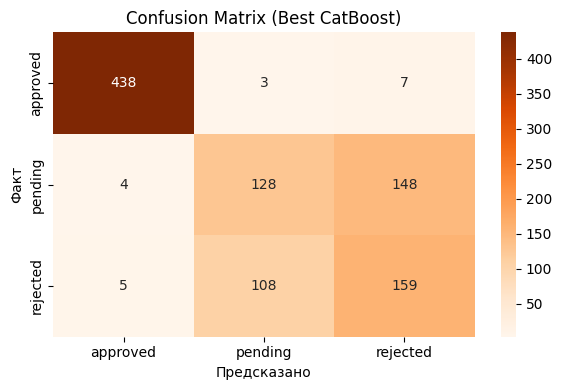

(0.725,
 np.float64(0.8441008825405162),
 np.float64(0.6882017650810324),
 '              precision    recall  f1-score   support\n\n    approved       0.98      0.98      0.98       448\n     pending       0.54      0.46      0.49       280\n    rejected       0.51      0.58      0.54       272\n\n    accuracy                           0.72      1000\n   macro avg       0.67      0.67      0.67      1000\nweighted avg       0.73      0.72      0.72      1000\n',
 {'random_strength': 5,
  'learning_rate': 0.08,
  'l2_leaf_reg': 5,
  'iterations': 1000,
  'depth': 6,
  'bagging_temperature': 0.2})

In [248]:
from catboost import Pool
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, make_scorer

#классы
classes = ['approved', 'pending', 'rejected']

#стратифицированная кросс-валидация
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

#macro-F1 как метрика
scorer = make_scorer(f1_score, average='macro')

#параметры для RandomizedSearchCV
param_dist = {
    'depth': [4, 6, 8],
    'learning_rate': [0.03, 0.05, 0.08],
    'l2_leaf_reg': [1, 3, 5, 7],
    'iterations': [500, 750, 1000],
    'random_strength': [1, 5, 10],
    'bagging_temperature': [0.2, 0.5, 1.0]
}

#базовая модель
base_model = CatBoostClassifier(
    cat_features=cat_features,
    class_weights={0: 1, 1: 2, 2: 2.5},
    verbose=100,
    random_state=42
)

#RandomizedSearchCV
search = RandomizedSearchCV(
    base_model,
    param_distributions=param_dist,
    n_iter=10,
    scoring=scorer,
    cv=cv,
    verbose=2,
    n_jobs=-1
)

#обучение подбора
search.fit(X_train, y_train)

#лучшая модель
best_model = search.best_estimator_

#предсказания и метрики
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)

accuracy_best = accuracy_score(y_test, y_pred)
report_best = classification_report(y_test, y_pred, target_names=classes)
auc_best = roc_auc_score(y_test, y_proba, multi_class='ovo')
gini_best = 2 * auc_best - 1

#confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=classes, yticklabels=classes, cmap='Oranges')
plt.xlabel('Предсказано')
plt.ylabel('Факт')
plt.title('Confusion Matrix (Best CatBoost)')
plt.tight_layout()
plt.show()

accuracy_best, auc_best, gini_best, report_best, search.best_params_

Обучу модель на отобранных параметрах

0:	learn: 1.0754405	total: 125ms	remaining: 2m 4s
100:	learn: 0.7442196	total: 3.01s	remaining: 26.8s
200:	learn: 0.5471413	total: 9.1s	remaining: 36.2s
300:	learn: 0.4788062	total: 17.3s	remaining: 40.2s
400:	learn: 0.4324035	total: 25.6s	remaining: 38.2s
500:	learn: 0.3890022	total: 31.2s	remaining: 31.1s
600:	learn: 0.3552276	total: 39.5s	remaining: 26.2s
700:	learn: 0.3227097	total: 46.3s	remaining: 19.7s
800:	learn: 0.2949092	total: 54s	remaining: 13.4s
900:	learn: 0.2698751	total: 1m	remaining: 6.6s
999:	learn: 0.2484068	total: 1m 8s	remaining: 0us
Accuracy: 0.725

Classification Report:
              precision    recall  f1-score   support

    approved       0.98      0.98      0.98       448
     pending       0.54      0.46      0.49       280
    rejected       0.51      0.58      0.54       272

    accuracy                           0.72      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.73      0.72      0.72      1000



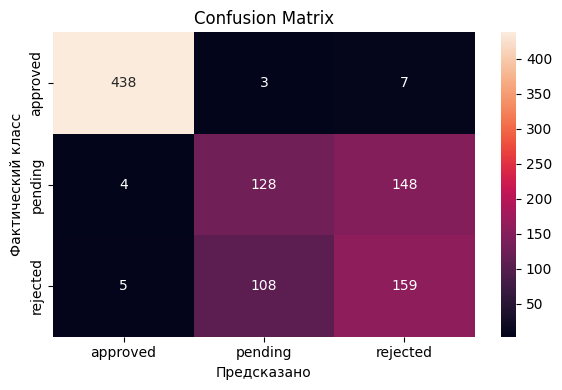

ROC AUC (multi-class): 0.8441
Gini coefficient: 0.6882


In [289]:
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.08,
    depth=6,
    l2_leaf_reg=5,
    bagging_temperature=0.2,
    random_strength=5,
    class_weights={0: 1, 1: 2, 2: 2.5},
    cat_features=cat_features,
    verbose=100,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test) #предсказания
y_proba = model.predict_proba(X_test)

#метрики
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Предсказано')
plt.ylabel('Фактический класс')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

#roc-auc и gini
auc = roc_auc_score(y_test, y_proba, multi_class='ovo', average='macro')
gini = 2 * auc - 1
print(f"ROC AUC (multi-class): {auc:.4f}")
print(f"Gini coefficient: {gini:.4f}")

Метрики упали по сравнению с прошлой моделью, буду пытаться добавить еще признаки с помощью NLP.

In [291]:
!pip install ace_tools

In [295]:
raw_df = pd.read_csv("data/5k.csv")

# Извлечем текстовые транзакции
text_data = raw_df['Transaction Description'].fillna('')

# Векторизация текста (TF-IDF)
tfidf = TfidfVectorizer(max_features=20, stop_words='english')
tfidf_matrix = tfidf.fit_transform(text_data)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f'trans_desc_{f}' for f in tfidf.get_feature_names_out()])

# Объединение с основным df
df.reset_index(drop=True, inplace=True)
tfidf_df.reset_index(drop=True, inplace=True)
df_nlp = pd.concat([df, tfidf_df], axis=1)

# Просмотр итогового датафрейма
df_nlp.head()


,Occupation,Risk Tolerance,Investment Goals,Income Level,Loan Purpose,Employment Status,Loan Term (Months),Interest Rate,Loan Status,Age Group,...,trans_desc_debited,trans_desc_group,trans_desc_llc,trans_desc_payment,trans_desc_plc,trans_desc_purchase,trans_desc_smith,trans_desc_sons,trans_desc_spent,trans_desc_transaction
0,Lawyer,High,Wealth Preservation,46044.94,Medical Expenses,Retired,36,0.1194,1,31–45,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000
1,Teacher,Low,Wealth Preservation,57169.50,Auto Purchase,Retired,36,0.0808,0,<30,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.682322,0.0,0.0,0.354925
2,Teacher,Low,Speculation,71760.86,Auto Purchase,Employed,12,0.1307,1,31–45,...,0.0,0.0,0.0,0.0,0.0,0.427670,0.000000,0.0,0.0,0.000000
3,Student,Medium,Speculation,-25488.15,Small Business,Retired,60,0.0673,0,<30,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000
4,Engineer,Low,Income Generation,106777.95,Medical Expenses,Employed,24,0.1060,0,31–45,...,0.0,0.0,0.0,0.0,0.0,0.424937,0.000000,0.0,0.0,0.000000


In [296]:
X = df_nlp.drop(columns=['Loan Status'])
y = df_nlp['Loan Status']

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

0:	learn: 1.0796044	total: 117ms	remaining: 1m 57s
100:	learn: 0.7517892	total: 5.99s	remaining: 53.4s
200:	learn: 0.5431389	total: 14.6s	remaining: 58.1s
300:	learn: 0.4791135	total: 22.7s	remaining: 52.7s
400:	learn: 0.4367238	total: 30.7s	remaining: 45.9s
500:	learn: 0.3968491	total: 39.6s	remaining: 39.5s
600:	learn: 0.3627102	total: 46.8s	remaining: 31s
700:	learn: 0.3344170	total: 55.2s	remaining: 23.6s
800:	learn: 0.3069061	total: 1m 4s	remaining: 16.1s
900:	learn: 0.2825918	total: 1m 11s	remaining: 7.9s
999:	learn: 0.2606988	total: 1m 20s	remaining: 0us
Accuracy: 0.729

Classification Report:
              precision    recall  f1-score   support

    approved       0.98      0.98      0.98       448
     pending       0.54      0.43      0.48       280
    rejected       0.51      0.62      0.56       272

    accuracy                           0.73      1000
   macro avg       0.68      0.68      0.67      1000
weighted avg       0.73      0.73      0.73      1000



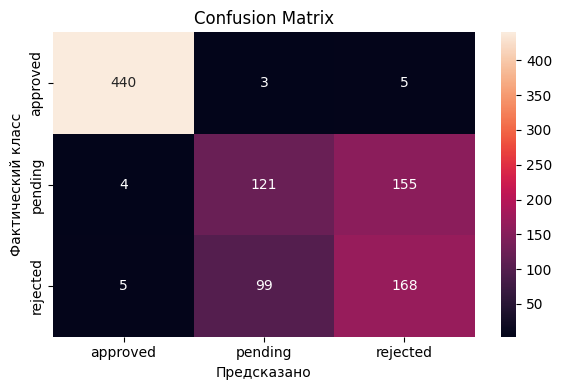

ROC AUC (multi-class): 0.8354
Gini coefficient: 0.6708


In [298]:
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.08,
    depth=6,
    l2_leaf_reg=5,
    bagging_temperature=0.2,
    random_strength=5,
    class_weights={0: 1, 1: 2, 2: 2.5},
    cat_features=cat_features,
    verbose=100,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test) #предсказания
y_proba = model.predict_proba(X_test)

#метрики
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Предсказано')
plt.ylabel('Фактический класс')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

#roc-auc и gini
auc = roc_auc_score(y_test, y_proba, multi_class='ovo', average='macro')
gini = 2 * auc - 1
print(f"ROC AUC (multi-class): {auc:.4f}")
print(f"Gini coefficient: {gini:.4f}")

In [299]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Interest Rate,47.853585
1,Loan Amount Log,20.081086
2,Loan Purpose,3.457330
3,balance_delta,2.414748
4,International Transfers Log,2.348552
5,Occupation,1.953912
6,Age Group,1.878581
7,Investments Log,1.876436
8,balance_to_loan,1.834642
9,activity_ratio,1.752836


Ни одного "сильного" признака не появилось.